In [3]:
import pandas as pd

In [8]:
man='https://webdata.illumina.com/downloads/productfiles/humanmethylation450/humanmethylation450_15017482_v1-2.csv'
man=pd.read_csv(man,index_col=0,skiprows=7,usecols=['IlmnID','CHR','MAPINFO','Name'])
man=man.dropna().copy()
man['CHR']='chr'+man['CHR'].astype(str)

/tmp/ipykernel_55132/2336228601.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  man=pd.read_csv(man,index_col=0,skiprows=7,usecols=['IlmnID','CHR','MAPINFO','Name'])


In [292]:
meta='https://ftp.ncbi.nlm.nih.gov/geo/series/GSE149nnn/GSE149438/matrix/GSE149438_series_matrix.txt.gz'
meta=pd.read_table(meta,skiprows=31,index_col=0).T
normal=meta[meta['!Sample_source_name_ch1']=='Normal']['!Sample_source_name_ch1'].sort_index()
crc=meta[meta['!Sample_source_name_ch1']=='CRC']['!Sample_source_name_ch1'].sort_index()

In [ ]:
normal.to_csv('list/norm',columns=[], header=False)
crc.to_csv('list/crc',columns=[], header=False)

In [171]:
crc=pd.read_table('data/pan/crc.merge',index_col=0)
#crc_col=['crc_'+str(i) for i in range(1, len(crc.columns)+1)]
#crc.columns=crc_col
crc.shape

(2036498, 40)

In [169]:
norm=pd.read_table('data/pan/norm.merge',index_col=0)
#norm_col=['norm_'+str(i) for i in range(1, len(norm.columns)+1)]
#norm.columns=norm_col
norm.shape

(2029698, 46)

In [241]:
dg=crc.merge(norm,left_index=True,right_index=True)

In [ ]:
dg['CHR']=dg.index.str.split(':').str[0]
dg['MAPINFO']=dg.index.str.split(':').str[1].astype(float)

In [253]:
dg['crc']=dg[crc.columns].mean(1)
dg['norm']=norm[norm.columns].mean(1)

In [254]:
dg['d']=dg['crc']-dg['norm']

In [4]:
hmr=pd.read_table('data/hmr/non-blood/crc.wbc',header=None)

In [292]:
hmr.sort_values(4).tail(10)

,0,1,2,3,4,5
11455,chr19,3178125,3181474,HYPO28718,175,+
19112,chr5,141430419,141433149,HYPO48200,177,+
2289,chr10,11162994,11173558,HYPO6076,181,+
7529,chr15,41501068,41503863,HYPO18867,184,+
13348,chr2,113272659,113278636,HYPO34185,228,+
137,chr1,6453980,6456321,HYPO469,250,+
9821,chr17,17722348,17725508,HYPO24459,269,+
15438,chr21,44240222,44243541,HYPO39157,295,+
15390,chr21,43425879,43428435,HYPO39076,301,+
24206,chrM,32,16542,HYPO60502,437,+


<Axes: >

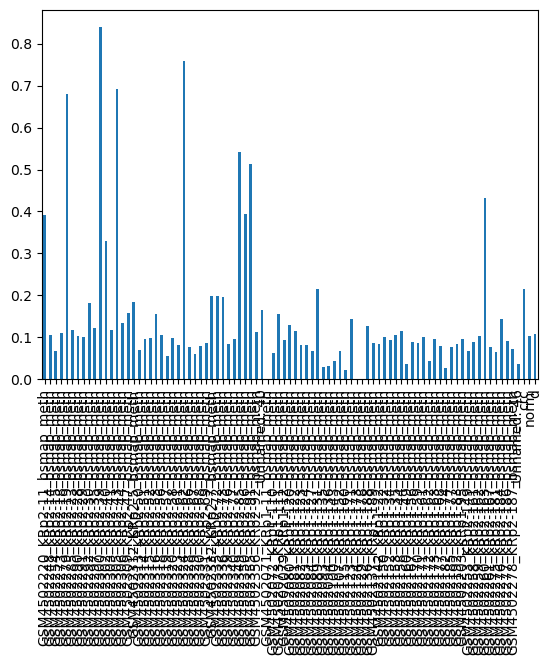

In [298]:
dg[((dg['CHR']=='chr17')&(dg['MAPINFO']>17625663)&(dg['MAPINFO']<17628822))
  |((dg['CHR']=='chr1')&(dg['MAPINFO']>6514041)&(dg['MAPINFO']<6516381))
  |((dg['CHR']=='chr2')&(dg['MAPINFO']>114030237)&(dg['MAPINFO']<114036213))
  |((dg['CHR']=='chr15')&(dg['MAPINFO']>41793267)&(dg['MAPINFO']<41796061))
].dropna().drop(['CHR','MAPINFO'],axis=1).median().plot(kind='bar')

In [276]:
l=['cg15603568',
'cg23559689',
'cg00343633',
'cg03225817',
'cg04747226',
'cg07972135',
'cg25832771',
'cg05085230',
'cg08712932',
'cg06132028',
'cg11942956',
'cg20787173',
'cg11664500',
'cg14287112',
'cg22871668',
'cg17222164',
'cg03048083',
'cg01627847',
'cg08124910',
'cg06952671',
'cg21995919',]

In [280]:
dgm=dg.merge(man, on=['CHR','MAPINFO'])
dgm.index=dgm['Name']

/tmp/ipykernel_55132/1379188943.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dgm.dropna()[dgm.dropna().index.isin(l)].median().drop(['MAPINFO','d','crc']).plot(kind='bar')


<Axes: >

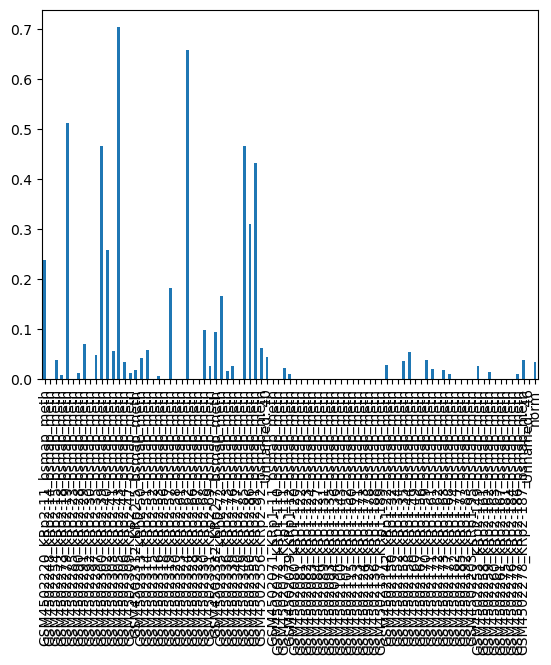

In [290]:
dgm.dropna()[dgm.dropna().index.isin(l)].median().drop(['MAPINFO','d','crc']).plot(kind='bar')

In [ ]:
(1-dg[dg.index.isin(l)].mean().drop(['MAPINFO','d'])).plot(kind='bar')

In [ ]:
crc['c1']=crc.iloc[:,0:5].mean(1)
crc['n1']=crc.iloc[:,10:15].mean(1)
crc['d1']=crc['c1']-crc['n1']
crc['c2']=crc.iloc[:,5:10].mean(1)
crc['n2']=crc.iloc[:,15:20].mean(1)
crc['d2']=crc['c2']-crc['n2']

In [ ]:
url='https://static-content.springer.com/esm/art%3A10.1038%2Fs41467-020-17316-z/MediaObjects/41467_2020_17316_MOESM4_ESM.xlsx'
df=pd.read_excel(url, engine='openpyxl')
df=df[(df['Utilized in LR Classifier?']=='Yes')].copy()[['Covered CpG Sites']]
df['sites']=df['Covered CpG Sites'].str.split(',').apply(lambda x:len(x))
for i,r in df.head(2).iterrows():
    sites=r['Covered CpG Sites'].split(',')
    for site in sites:
        print(site)
site.split(':')        